# Data mining, Marshalkin Nikita

## Table of contents:
- [Assignment 1, feature types](#a1)
- [Assignment 2, data sources](#a2)
- [Assignment 3, preparation](#a3)
- [Assignment 4, descriptive statistics](#a4)
- [Assignment 5, visualization](#a5)
- [Assignment 6, time series](#a6)
- [Assignment 7, exponential smoothing](#a7)
- [Assignment 8,  k-nearest neighbours](#a8)
- [Assignment 9,  clustering](#a9)

 <a id='a1'></a>
## Assignment 1, feature types

| Feature Name | Type |
| - | - |
| Color | nominal scale |
| Maximal.speed | ratio scale |
| False.start | dichotomous scale |
| Place.in.the.competition | ordinal scale |
| Birth.day | interval scale |
| Birth.month | interval scale |
| Birth.year | interval scale |




In [2]:
data <- read.csv("Humsters.csv")

In [3]:
data

Name,Color,Maximal.speed,False.start,Place.in.the.competition,Birth.day,Birth.month,Birth.year
Boo Bear,Beige,1.576113,0,7,28,9,2015
Lovebug,Black,2.428636,0,14,1,5,2015
Sugar Cookie,Sable,3.560036,0,2,28,11,2017
Skittles,Sable,2.446361,0,11,26,9,2016
Bunny,Beige,3.835057,0,4,3,1,2016
Gingersnap,Dark eared white,4.102686,0,8,19,8,2017
Paws,Beige,1.801966,0,3,18,10,2016
Tigger,Dark eared white,3.159759,0,5,20,4,2016
Bebe,Cream,2.780990,0,17,11,11,2017
Butterscotch,Sable,1.387136,1,1,7,9,2015


 <a id='a2'></a>
## Assignment 2, data sources

Source: https://archive.ics.uci.edu/ml/datasets/iris

In [349]:
iris <- fread("iris.data", sep = ",", header = F)
names(iris) = c("sepal.length", "sepal.width", "petal.length", "petal.width", "class")

In [350]:
head(iris)

sepal.length,sepal.width,petal.length,petal.width,class
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa


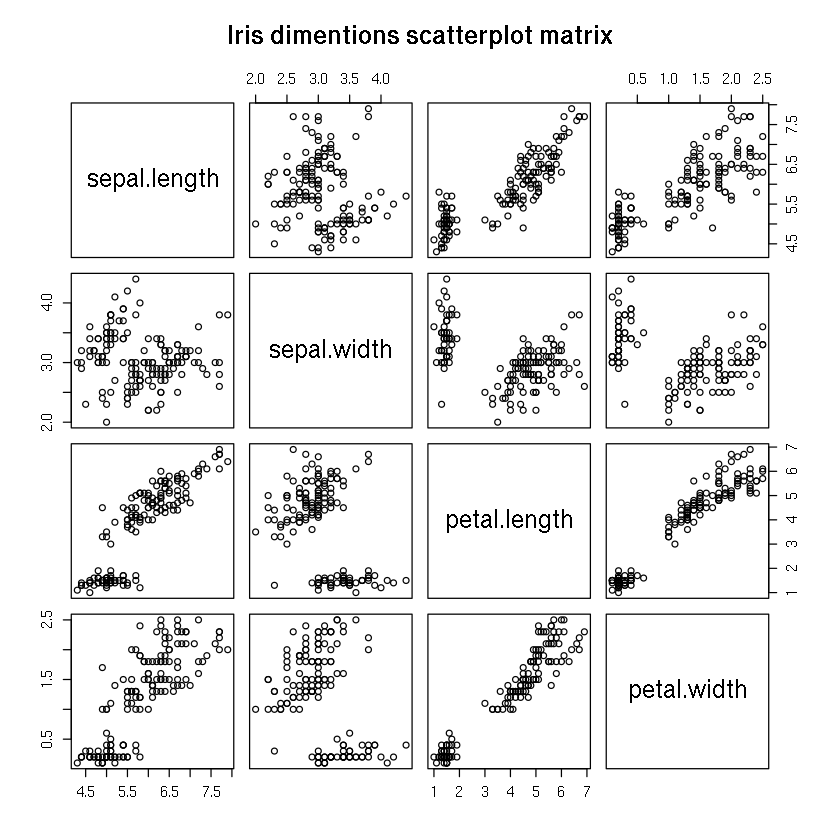

In [317]:
pairs(~sepal.length + sepal.width + petal.length + petal.width, data = iris, 
   main="Iris dimentions scatterplot matrix")

#### Australian wines

Source: Australian Bureau of Statistics

JAN 1980 - JUN 1994.

| Feature | Description |
| :-- | :-- |
| fort | Fortified wine (kilolitre) |
| dry | Dry wine (kilolitre) |
| sweet | Sweet wine (kilolitre) | 
| red | Red wine (kilolitre) | 
| rose | Rose wine (kilolitre) | 
| spark | Sparkling wine (kilolitre) |
| total | Total sales (bottles) |

In [318]:
wine <- fread("wine_Austral.data", header = T)

In [319]:
head(wine)

fort,dry,sweet,red,rose,spark,total,year_,month_,date_
2585,1954,85,464,112,1686,15136,1980,1,JAN 1980
3368,2302,89,675,118,1591,16733,1980,2,FEB 1980
3210,3054,109,703,129,2304,20016,1980,3,MAR 1980
3111,2414,95,887,99,1712,17708,1980,4,APR 1980
3756,2226,91,1139,116,1471,18019,1980,5,MAY 1980
4216,2725,95,1077,168,1377,19227,1980,6,JUN 1980


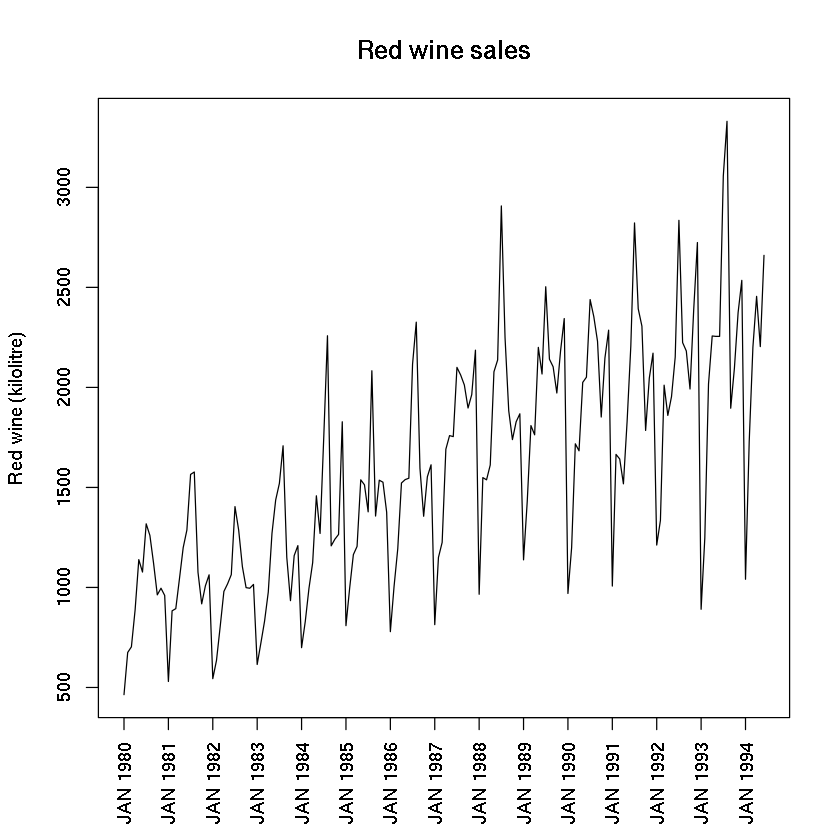

In [9]:
plot(wine$red, type = "l", ylab="Red wine (kilolitre)", main="Red wine sales", xaxt='n', xlab = NA)
axis(1, at=seq(1, length(wine$red), by=12), labels=wine$date_[seq(1, length(wine$red), by=12)], las=2)

 <a id='a3'></a>
## Assignment 3, preparation

Sample variance

In [10]:
var(iris$sepal.width)

[1] 0.188004

Sample diviation

In [11]:
sd(iris$sepal.width)

[1] 0.4335943

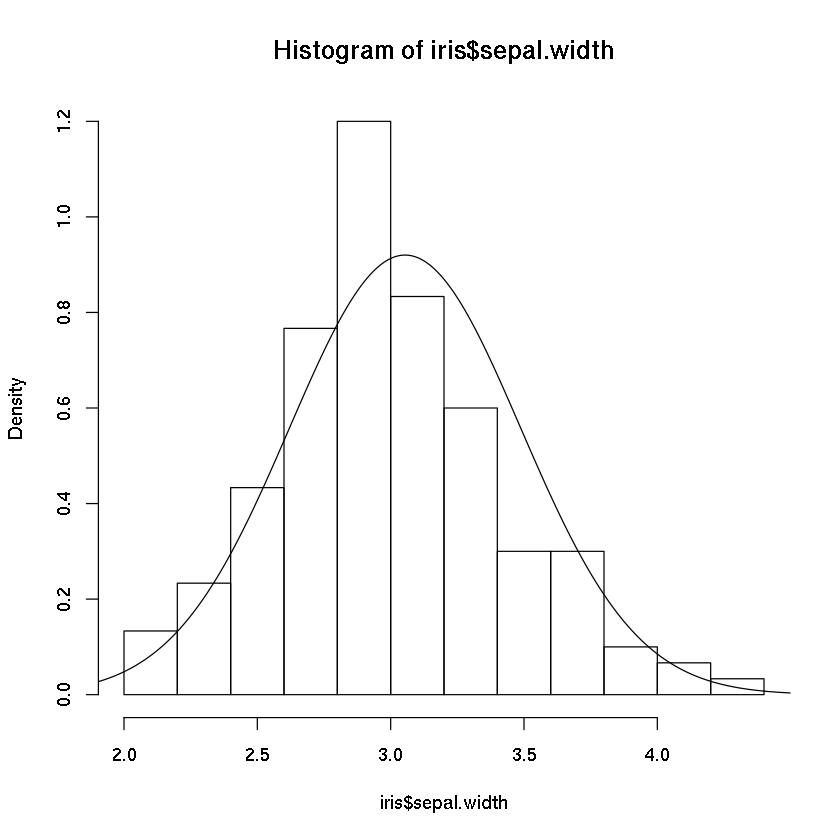

In [12]:
hist(iris$sepal.width, freq = F)
x <- seq(1, 5, length = 1000)
y <- dnorm(x, mean = mean(iris$sepal.width), sd = sd(iris$sepal.width))
lines(x, y)

In [13]:
cor <- c(iris$sepal.width, 100)
var(cor)
sd(cor)

[1] 62.42865

[1] 7.90118

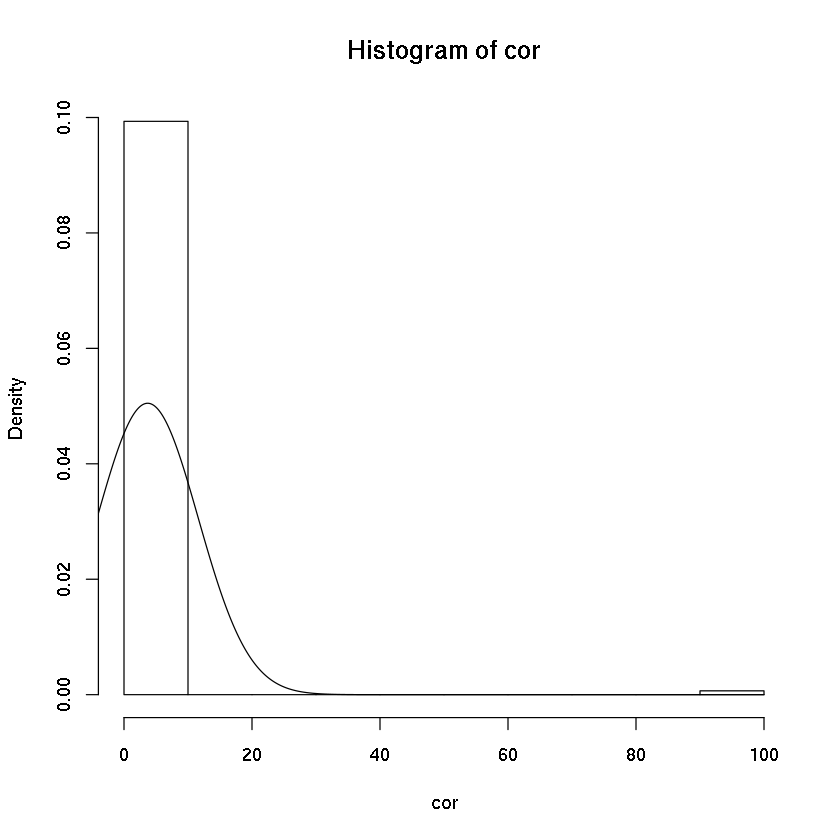

In [14]:
hist(cor, freq = F)
x <- seq(-10, 100, length = 1000)
y <- dnorm(x, mean = mean(cor), sd = sd(cor))
lines(x, y)

 <a id='a4'></a>
## Assignment 4, descriptive statistics

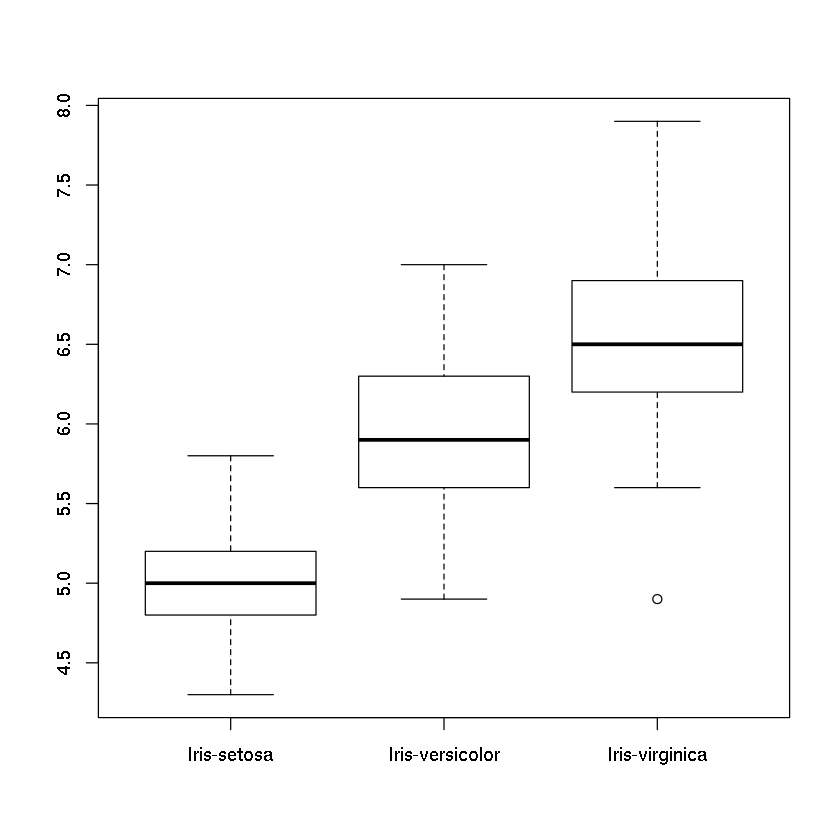

In [15]:
boxplot(iris$sepal.length ~ iris$class)

 <a id='a5'></a>
## Assignment 5, visualization

In [16]:
months <- c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec")

In [17]:
sparkling.mean <- aggregate(wine$spark, by=list(wine$month_), mean)

In [18]:
sparkling.mean

Group.1,x
1,1614.000
2,1593.667
3,1863.400
4,1767.133
5,1597.400
6,1458.933
7,1958.000
8,2263.000
9,2112.786
10,2997.714


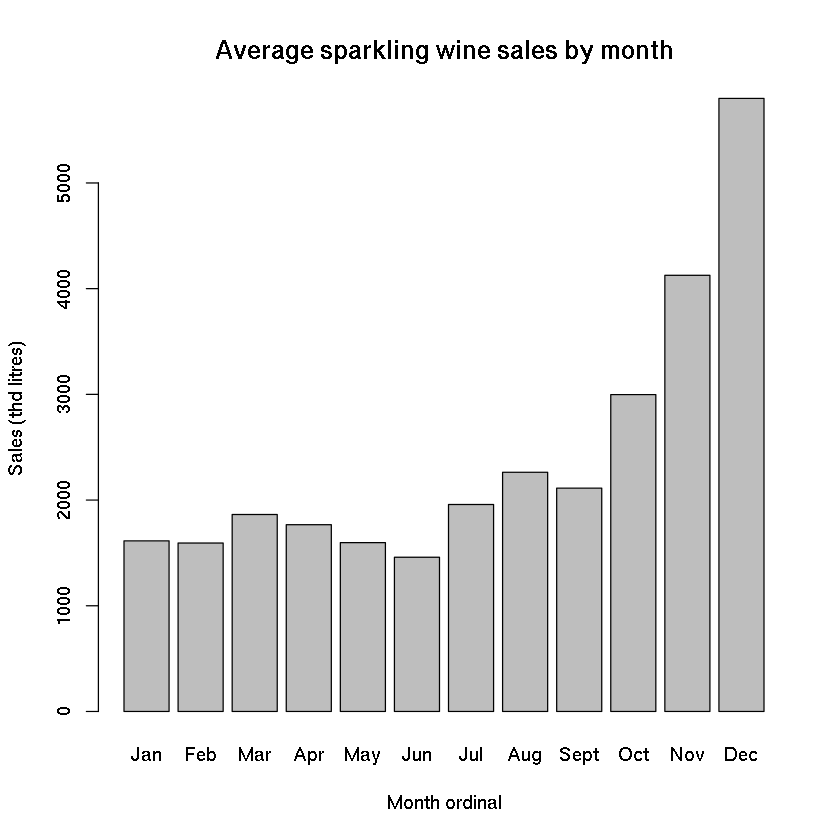

In [19]:
barplot(height = sparkling.mean$x, names.arg = months[sparkling.mean$Group.1], main = "Average sparkling wine sales by month", xlab = "Month ordinal", ylab = "Sales (thd litres)")  

In [20]:
length(wine$red)

[1] 174

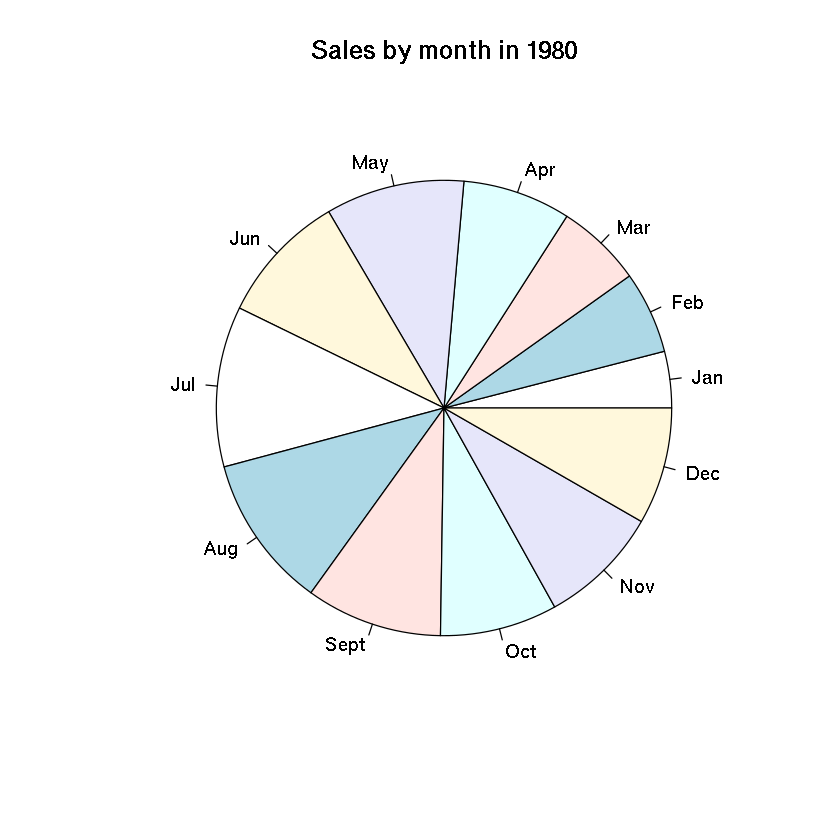

In [21]:
pie(wine$red[1:12], labels = months, main="Sales by month in 1980")

effect of variables:
 modified item       Var           
 "height of face   " "sepal.length"
 "width of face    " "sepal.width" 
 "structure of face" "petal.length"
 "height of mouth  " "petal.width" 
 "width of mouth   " "sepal.length"
 "smiling          " "sepal.width" 
 "height of eyes   " "petal.length"
 "width of eyes    " "petal.width" 
 "height of hair   " "sepal.length"
 "width of hair   "  "sepal.width" 
 "style of hair   "  "petal.length"
 "height of nose  "  "petal.width" 
 "width of nose   "  "sepal.length"
 "width of ear    "  "sepal.width" 
 "height of ear   "  "petal.length"


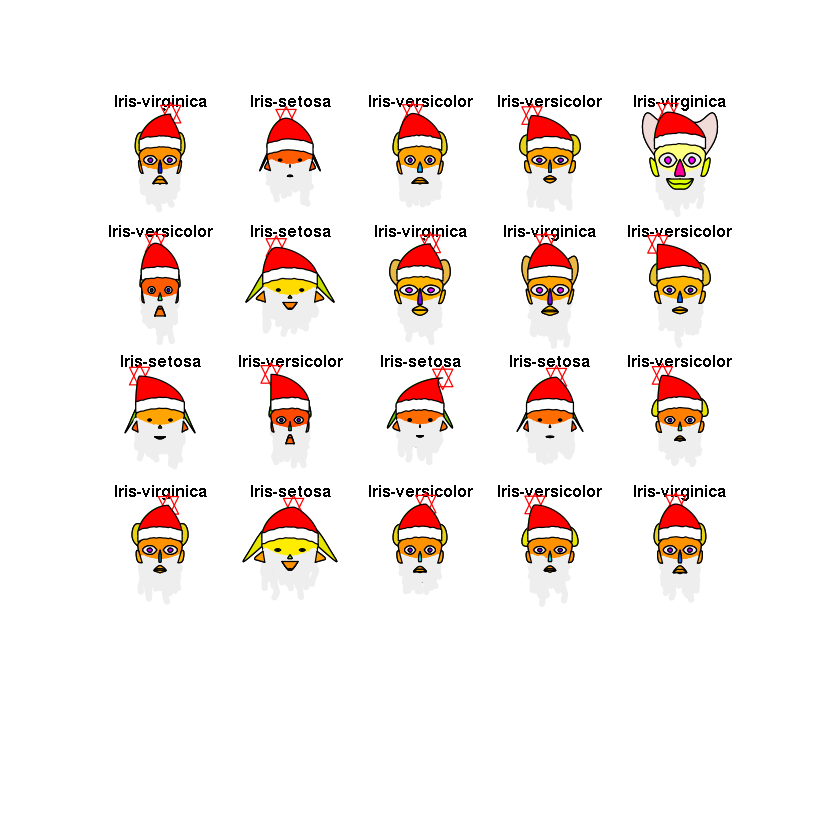

In [459]:
require(aplpack)
iris.faces <-  iris[sample(nrow(iris)),]
faces(iris.faces[1:20,1:4], labels = iris.faces[1:20]$class, face.type = 2)

 <a id='a6'></a>
## Assignment 6, time series

In [37]:
wine.dry <- wine$dry

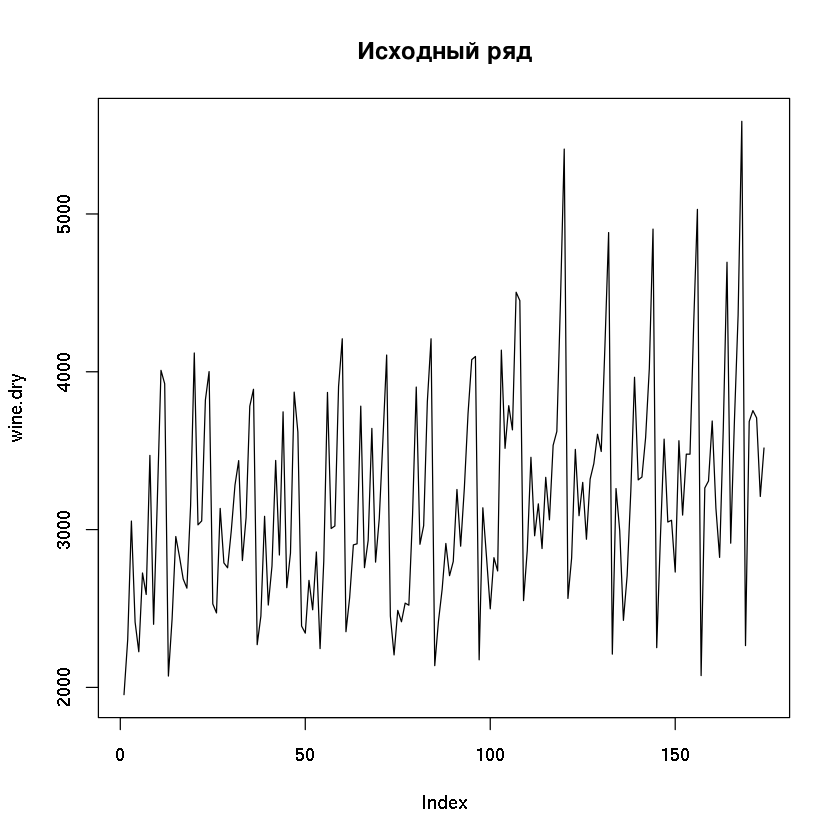

In [80]:
plot(wine.dry, t="l", main = "Исходный ряд")

In [39]:
ma <- function(x, n=5){ filter(x, rep(1 / n, n), sides = 2) }

In [40]:
length(wine.dry) - 6

[1] 168

In [41]:
g <- 12
wine.dry.smoothed <- ma(wine.dry, n = g)
wind.dry.cut <- wine.dry[7:168]

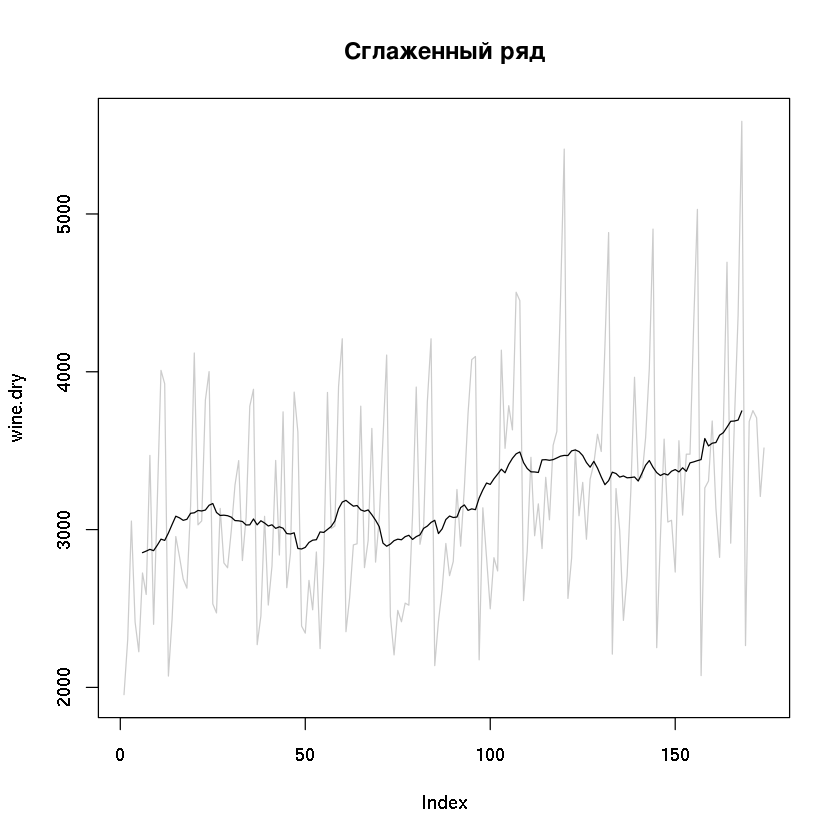

In [81]:
plot(wine.dry, col =  rgb(0, 0,0, 0.2), t = "l", main = "Сглаженный ряд")
lines(wine.dry.smoothed)

In [87]:
time <- 1:174
wine.dry.trend.fit <- lm(wine.dry.smoothed ~ time)
summary(wine.dry.trend.fit)


Call:
lm(formula = wine.dry.smoothed ~ time)

Residuals:
     Min       1Q   Median       3Q      Max 
-250.788  -82.414    2.158   99.628  232.627 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2864.9940    19.6458  145.83   <2e-16 ***
time           3.8941     0.1986   19.61   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 119.3 on 161 degrees of freedom
  (11 observations deleted due to missingness)
Multiple R-squared:  0.7048,	Adjusted R-squared:  0.703 
F-statistic: 384.4 on 1 and 161 DF,  p-value: < 2.2e-16


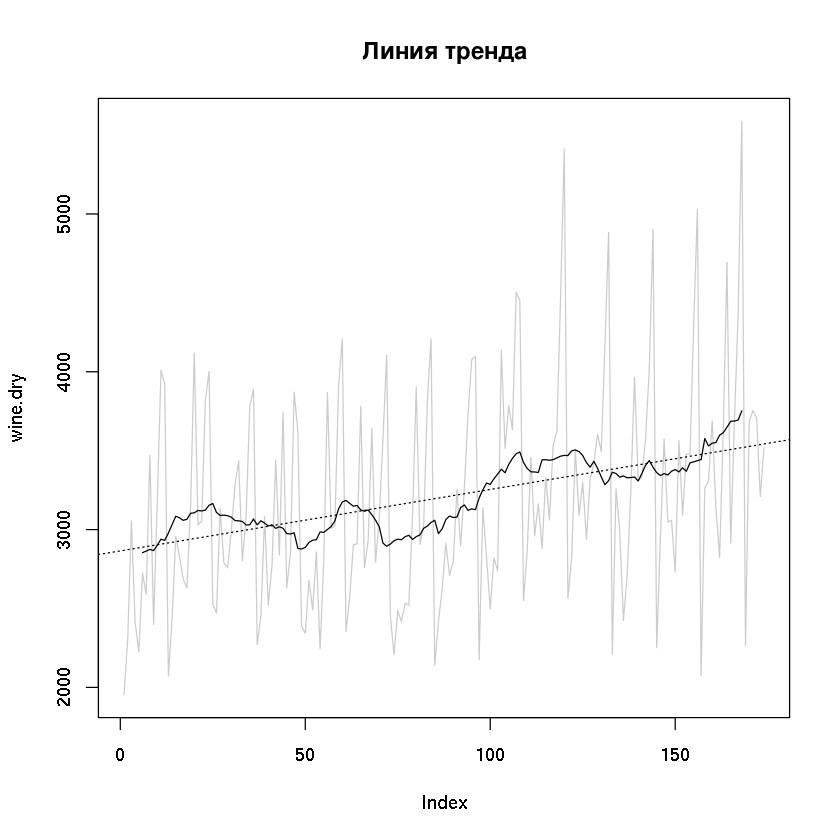

In [88]:
plot(wine.dry, col =  rgb(0, 0,0, 0.2), t = "l", main = "Линия тренда")
lines(wine.dry.smoothed, col = rgb(0, 0, 0))
abline(wine.dry.trend.fit$coefficients[1], wine.dry.trend.fit$coefficients[2], lty = "dotted")

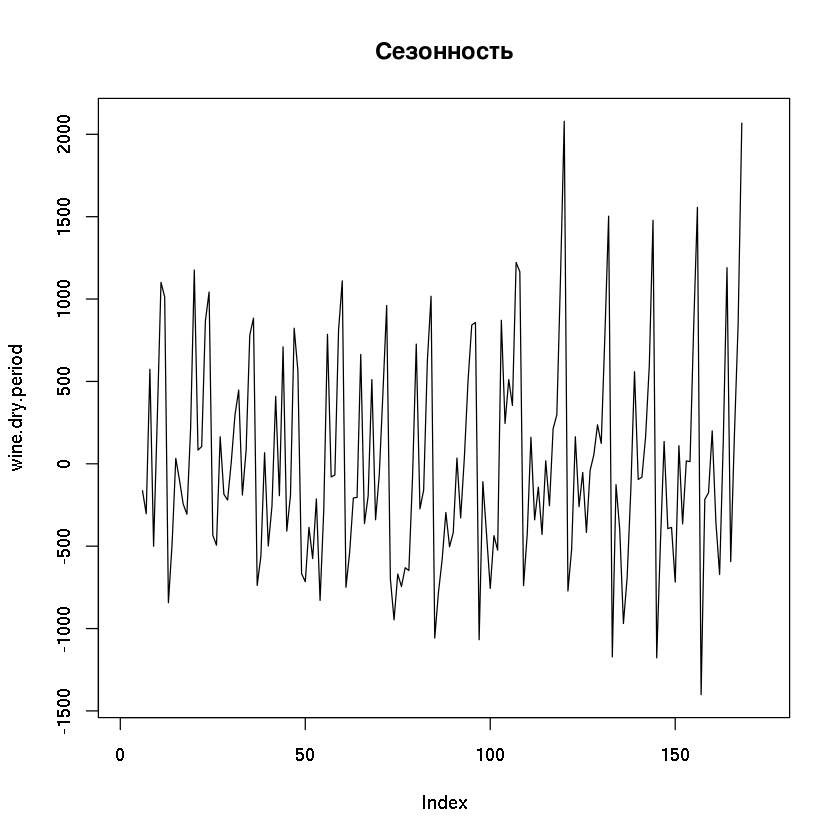

In [91]:
wine.dry.trend.fitted <- c(rep(NA, 5), wine.dry.trend.fit$fitted.values, rep(NA, 6))
wine.dry.period <- wine.dry - wine.dry.trend.fitted
plot(wine.dry.period, t = "l", main = "Сезонность")

In [92]:
eval.season <- function(x) { mean(wine.dry.period[seq(x, length(wine.dry.period), 12)], na.rm = TRUE) }
season <- sapply(1:12, eval.season)

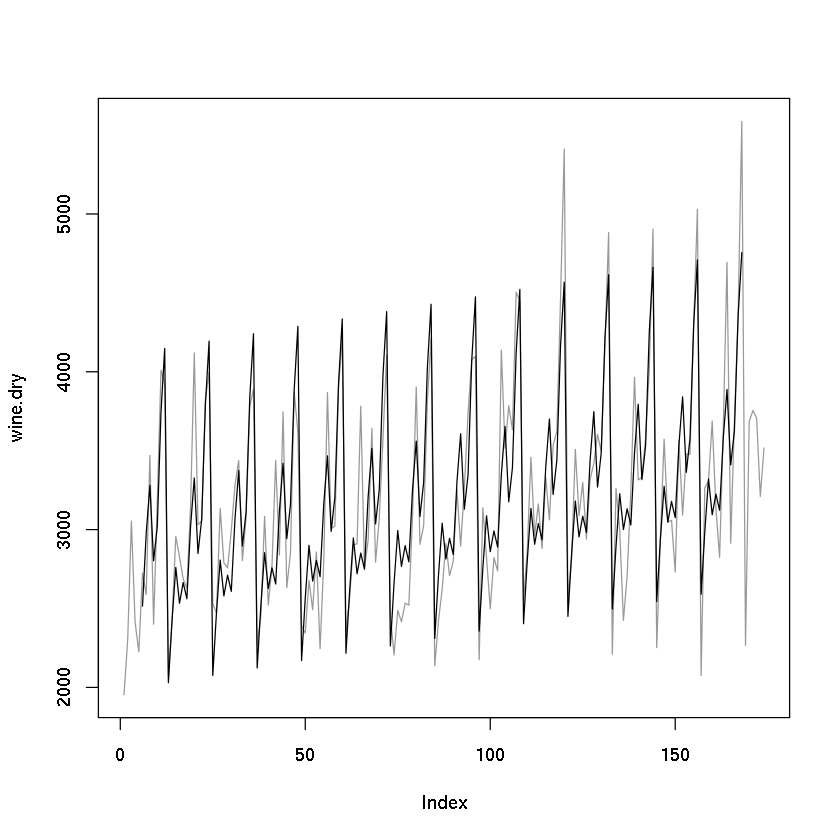

In [270]:
plot(wine.dry, t = "l", col=rgb(0,0,0,0.4))
predict <- wine.dry.trend.fitted + season[rep(1:12, 40)][1:length(wine.dry.trend.fitted)]
lines(predict, t = "l", col = rgb(0,0,0))

Mean average error

In [141]:
mean(abs(predict - wine.dry), na.rm = T)

[1] 244.9477

Root mean square error

In [142]:
sd(predict - wine.dry, na.rm = T)

[1] 318.7955

Mean percentage error

In [143]:
mean((predict - wine.dry) / wine.dry, na.rm = T) * 100

[1] 0.9142318

Mean absolute percentage error

In [144]:
mean(abs(predict - wine.dry) / wine.dry, na.rm = T) * 100

[1] 7.74987

Absolute deviation

In [147]:
sum(abs(predict - mean(wine.dry, na.rm = T)), na.rm = T)

[1] 76404.04

Mean absolute deviation

In [149]:
mean(abs(predict - mean(wine.dry)), na.rm = T)

[1] 468.7364

Coefficient of determination

In [150]:
var(predict - mean(wine.dry), na.rm = T) / var(wine.dry - mean(wine.dry), na.rm = T)

[1] 0.7743493

Theil index

In [157]:
sqrt(sum((predict - wine.dry)^2, na.rm = T) / (sum((predict)^2, na.rm = T) + sum((wine.dry)^2, na.rm = T)))

[1] 0.06760138

 <a id='a7'></a>
## Assignment 7, exponential smoothing

In [165]:
length(wine.dry)

[1] 174

In [284]:
learn <- ts(wine.dry[1:170], deltat = 1/12, start = 1)
test <- ts(wine.dry[171:length(wine.dry)], deltat = 1/12, start = c(1, 171))

In [285]:
learn

    Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
1  1954 2302 3054 2414 2226 2725 2589 3470 2400 3180 4009 3924
2  2072 2434 2956 2828 2687 2629 3150 4119 3030 3055 3821 4001
3  2529 2472 3134 2789 2758 2993 3282 3437 2804 3076 3782 3889
4  2271 2452 3084 2522 2769 3438 2839 3746 2632 2851 3871 3618
5  2389 2344 2678 2492 2858 2246 2800 3869 3007 3023 3907 4209
6  2353 2570 2903 2910 3782 2759 2931 3641 2794 3070 3576 4106
7  2452 2206 2488 2416 2534 2521 3093 3903 2907 3025 3812 4209
8  2138 2419 2622 2912 2708 2798 3254 2895 3263 3736 4077 4097
9  2175 3138 2823 2498 2822 2738 4137 3515 3785 3632 4504 4451
10 2550 2867 3458 2961 3163 2880 3331 3062 3534 3622 4464 5411
11 2564 2820 3508 3088 3299 2939 3320 3418 3604 3495 4163 4882
12 2211 3260 2992 2425 2707 3244 3965 3315 3333 3583 4021 4904
13 2252 2952 3573 3048 3059 2731 3563 3092 3478 3478 4308 5029
14 2075 3264 3308 3688 3136 2824 3644 4694 2914 3686 4358 5587
15 2265 3685                                           

In [286]:
test

    Mar  Apr  May  Jun
15 3754 3708 3210 3517

In [293]:
exp.fit <- HoltWinters(learn, seasonal = "additive")
summary(exp.fit)

             Length Class  Mode     
fitted       632    mts    numeric  
x            170    ts     numeric  
alpha          1    -none- numeric  
beta           1    -none- numeric  
gamma          1    -none- numeric  
coefficients  14    -none- numeric  
seasonal       1    -none- character
SSE            1    -none- numeric  
call           3    -none- call     

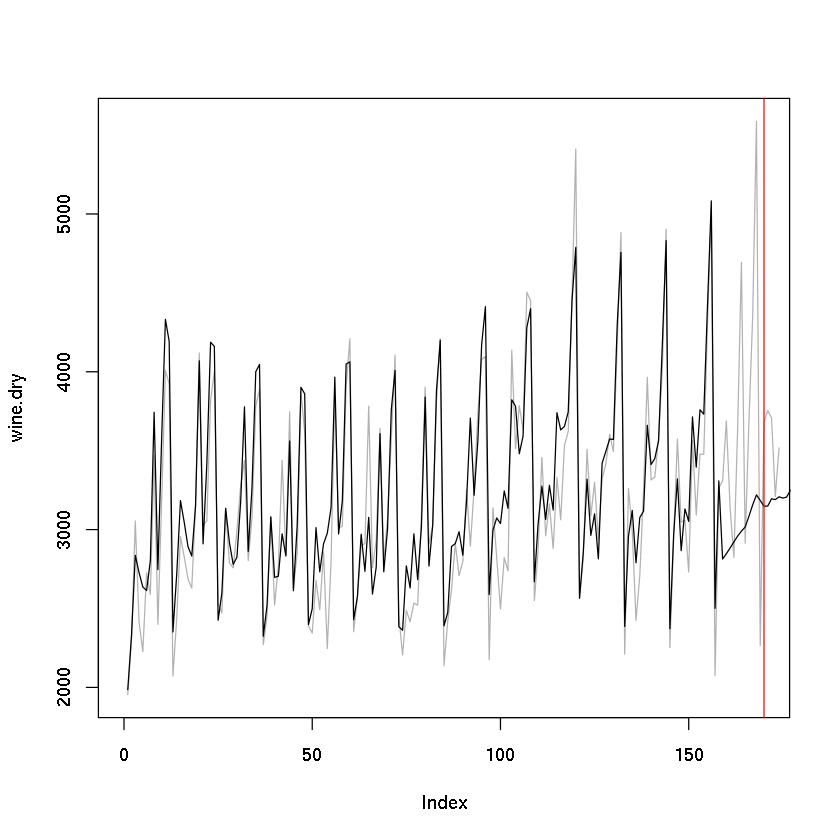

In [298]:
plot(wine.dry, col = rgb(0,0,0,0.3), t = "l", xlim = c(0, 170))
lines(c(array(exp.fit$fitted), predict(exp.fit, 4)))
abline(v = 170, col = "red")

In [299]:
predict <- array(predict(exp.fit, 4))
test <- array(test)

RSME

In [300]:
sd(test - predict)

[1] 203.1346

 <a id='a8'></a>
## Assignment 8,  k-nearest neighbours

In [351]:
require(class)

In [352]:
split <- split(iris, iris$class)

In [358]:
train <- rbind(split$'Iris-setosa'[1:25], split$'Iris-versicolor'[1:25], split$'Iris-virginica'[1:25])
test <- rbind(split$'Iris-setosa'[26:50], split$'Iris-versicolor'[26:50], split$'Iris-virginica'[26:50])
train$class <- factor(train$class)
test$class <- factor(test$class)

In [357]:
train

sepal.length,sepal.width,petal.length,petal.width,class
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa


In [364]:
predict <- knn(train[, 1:4], test[,1:4], train$class, k = 3, prob=TRUE)

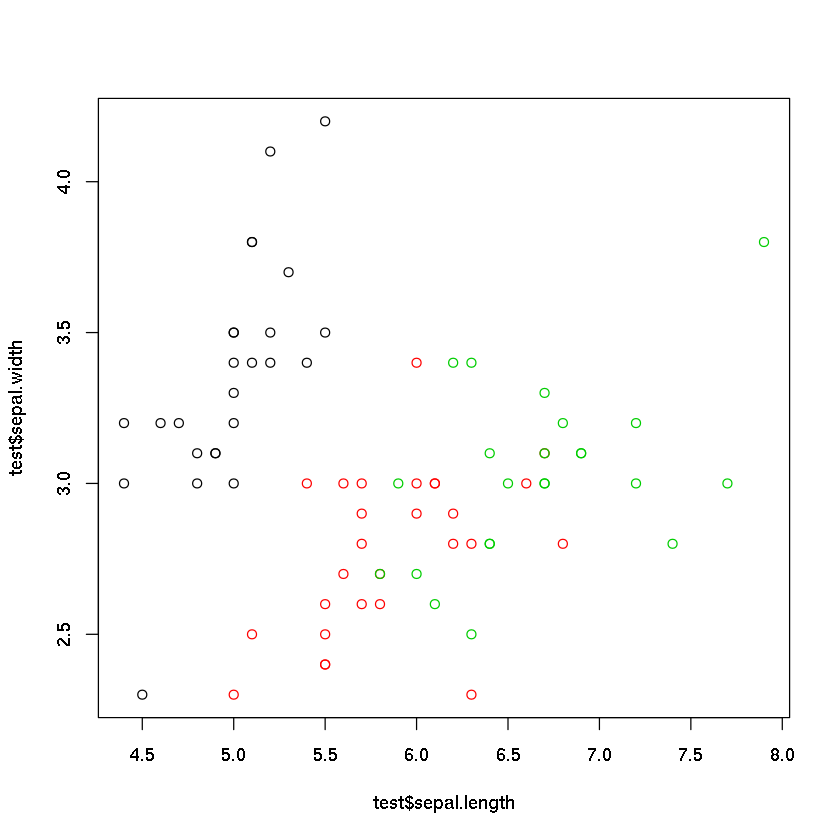

In [369]:
plot(test$sepal.length, test$sepal.width, col = predict)

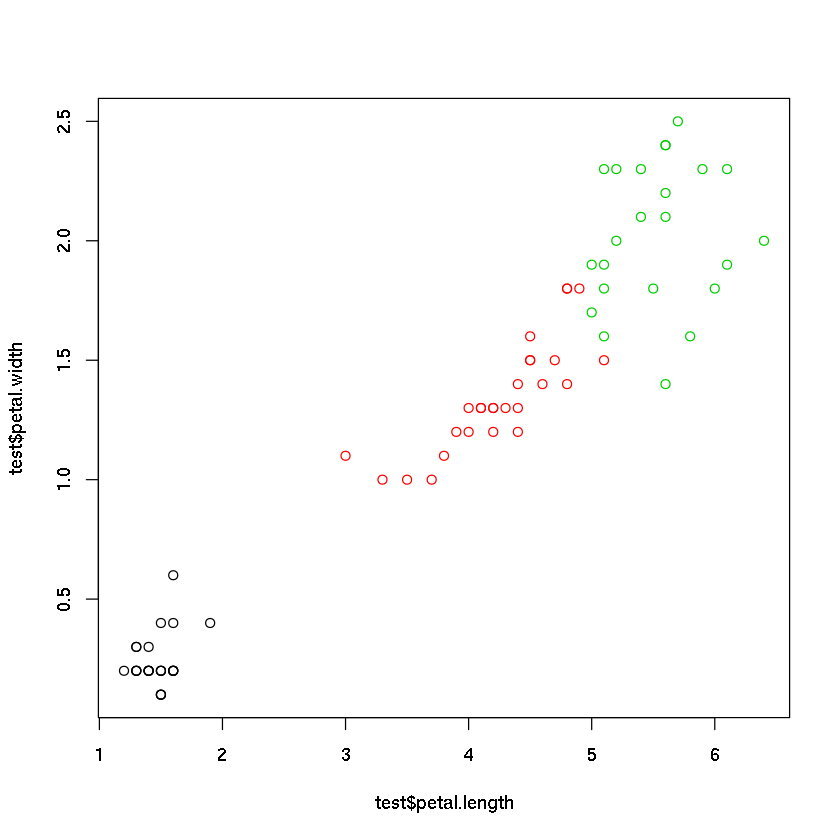

In [377]:
plot(test$petal.length, test$petal.width, col = predict)

Accuracy

In [378]:
precision <- sum (test$class == predict) / length(test$class)
precision

[1] 0.92

 <a id='a9'></a>
## Assignment 9,  clustering

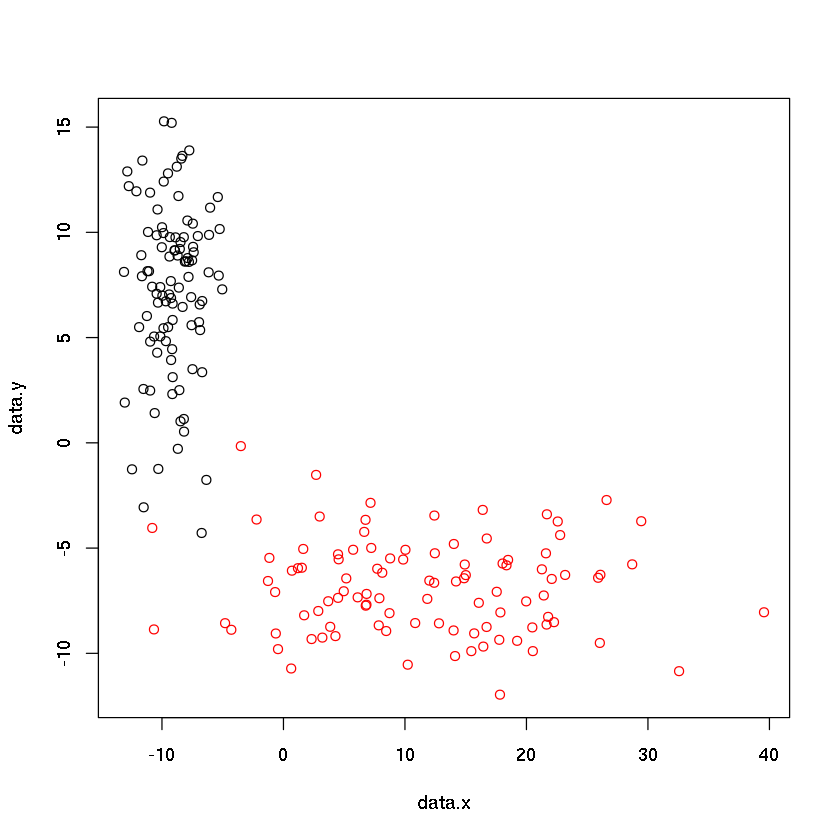

In [402]:
data.x <- c(rnorm(100, 9, 10), rnorm(100, -9, 2))
data.y <- c(rnorm(100, -7, 2), rnorm(100, 7, 4))
class <- factor(c(rep(1, 100), rep(0, 100)))
data <- data.table(data.x, data.y)
plot(data.x, data.y, col=class)

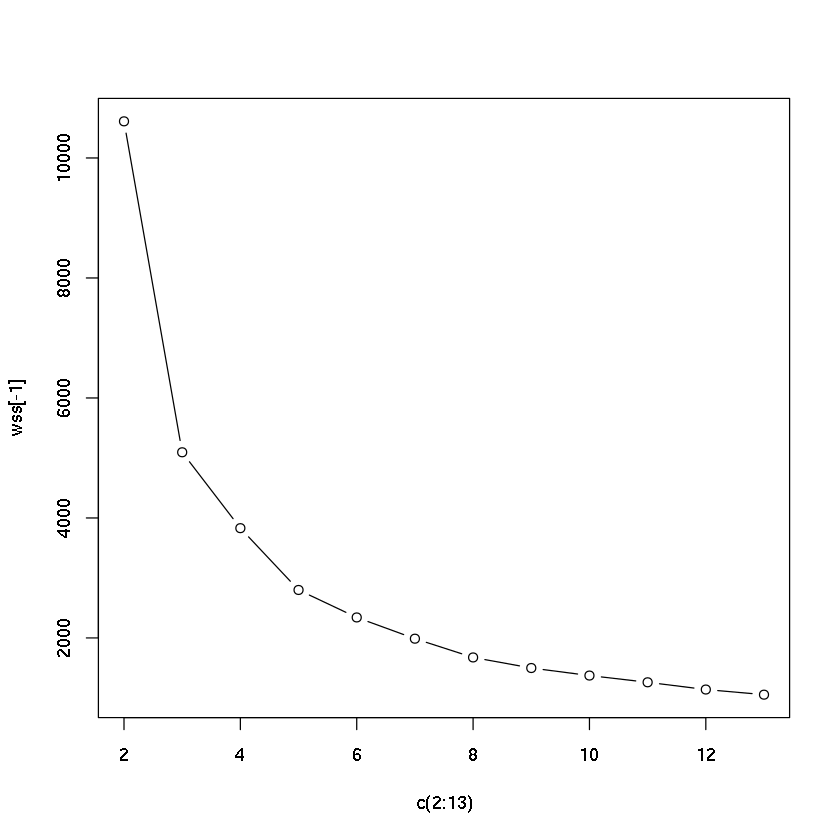

In [403]:
wss <- rep(NA, 13)                                                                                                                              
for (i in c(2:13)) {                                                                                                                           
    wss[i] <- kmeans(data, i, iter.max = 100, nstart = 100, algorithm = "Lloyd")$tot.withins                                                
}                                                                                                                                              
plot(c(2:13), wss[-1], type = "b") 

In [407]:
fit <- kmeans(data, 3, iter.max = 100, nstart = 100, algorithm = "Lloyd")$cluster

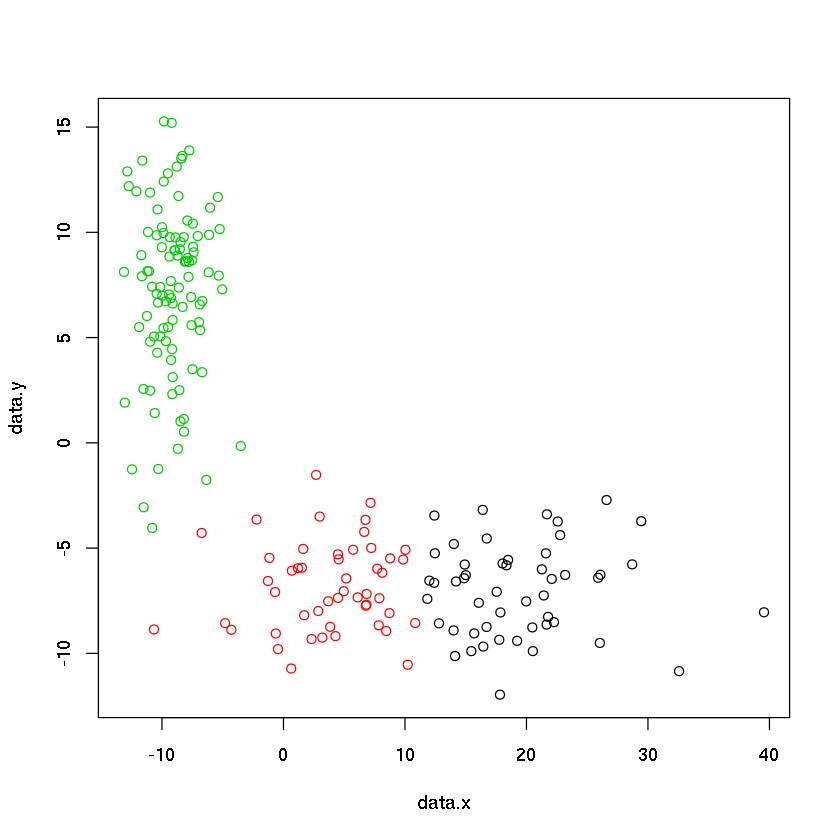

In [419]:
plot(data.x, data.y, col=fit)

In [438]:
require(dbscan)

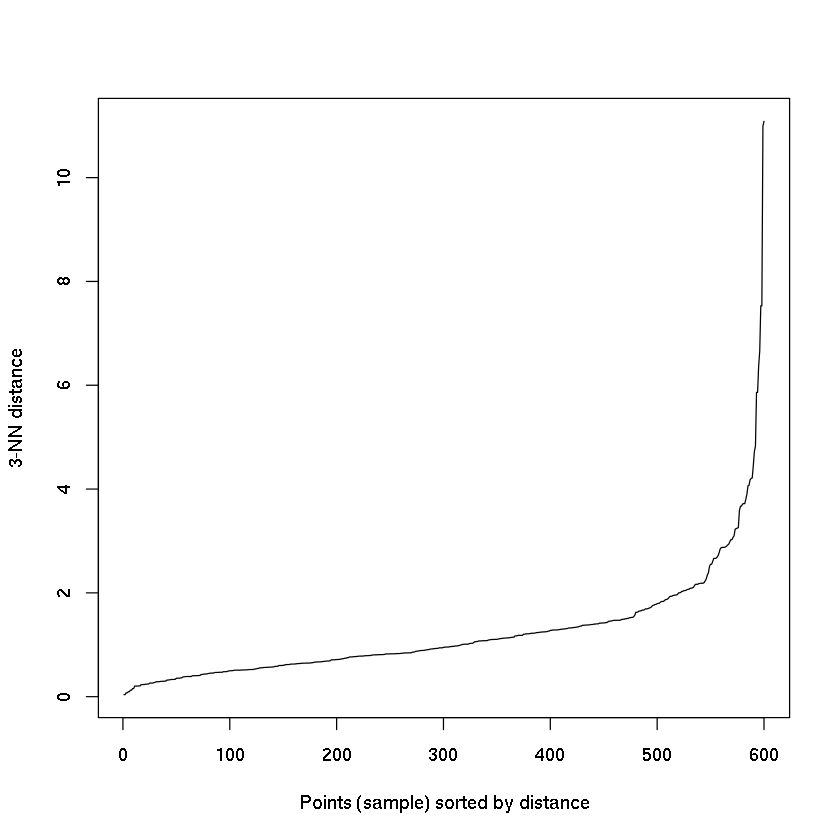

In [439]:
kNNdistplot(data, k = 3)

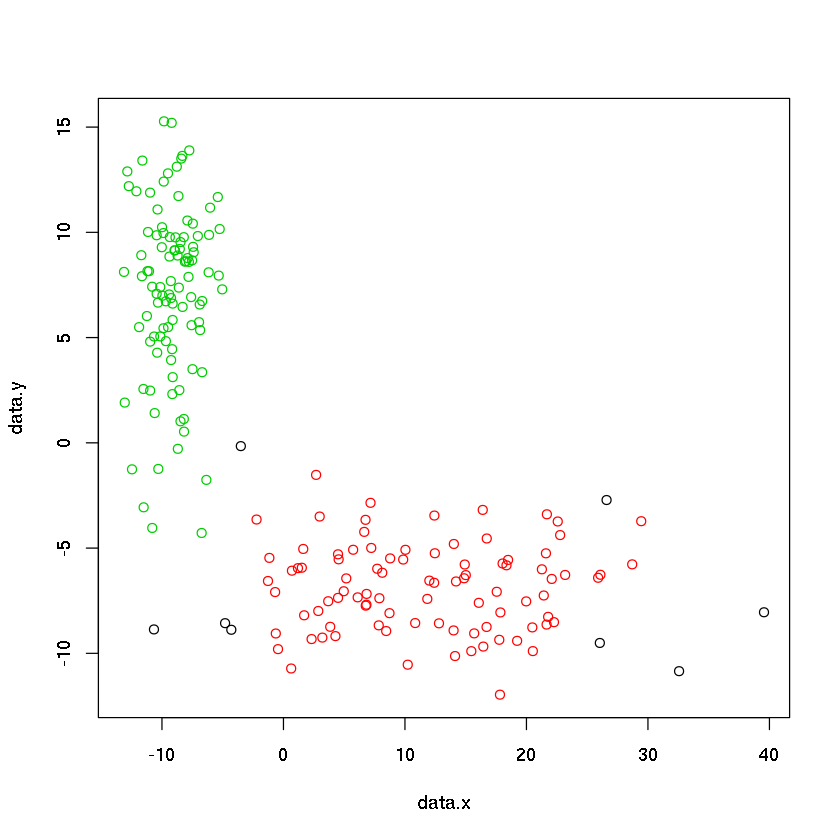

In [442]:
db <- dbscan(data, eps = 3, minPts = 3)
plot(data.x, data.y, col=(db$cluster + 1))